# Preparation

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('/content/drive/MyDrive/data_finals.csv')
df.head()

,content,appVersion,text_lower,removed_special_char,remove_slang,tokenized_word,stopwords_removed,stemmed_word,Final_content,polarity_score,polarity
0,Aplikasi KAI Acces sebelumnya lebih simple dan...,6.4.1,aplikasi kai acces sebelumnya lebih simple dan...,aplikasi kai acces sebelumnya lebih simple dan...,aplikasi kai acces sebelumnya lebih simple dan...,"['aplikasi', 'kai', 'acces', 'sebelumnya', 'le...","['aplikasi', 'kai', 'acces', 'simple', 'langsu...","['aplikasi', 'kai', 'acces', 'simple', 'langsu...",aplikasi kai acces simple langsung lancar sesu...,-8,negative
1,Entah kenapa appnya yg update terbaru sekarang...,6.9.11,entah kenapa appnya yg update terbaru sekarang...,entah kenapa appnya yg update terbaru sekarang...,entah kenapa appnya yg update terbaru sekarang...,"['entah', 'kenapa', 'appnya', 'yg', 'update', ...","['appnya', 'yg', 'update', 'terbaru', 'error',...","['appnya', 'yg', 'update', 'baru', 'error', 's...",appnya yg update terbaru error sistemnya kali ...,-9,negative
2,Setelah update terakhir ko malah susah banget ...,6.9.11,setelah update terakhir ko malah susah banget ...,setelah update terakhir ko malah susah banget ...,setelah update terakhir ko malah susah banget ...,"['setelah', 'update', 'terakhir', 'ko', 'malah...","['update', 'ko', 'susah', 'banget', 'login', '...","['update', 'ko', 'susah', 'banget', 'login', '...",update ko susah banget login siiiiih bbrp meni...,-6,negative
3,Menurut aku sih secara UI udah rapih dan mudah...,6.9.11,menurut aku sih secara ui udah rapih dan mudah...,menurut aku sih secara ui udah rapih dan mudah...,menurut aku sih secara ui udah rapih dan mudah...,"['menurut', 'aku', 'sih', 'secara', 'ui', 'uda...","['ui', 'udah', 'rapih', 'mudah', 'pemesanan', ...","['ui', 'udah', 'rapih', 'mudah', 'mesan', 'tik...",ui udah rapih mudah pemesanan tiket utamanya a...,-13,negative
4,"Min, kalo bisa ditambahin lagi dong settingann...",6.9.11,"min, kalo bisa ditambahin lagi dong settingann...",min kalo bisa ditambahin lagi dong settinganny...,min kalo bisa ditambahin lagi dong settinganny...,"['min', 'kalo', 'bisa', 'ditambahin', 'lagi', ...","['min', 'kalo', 'ditambahin', 'settingannya', ...","['min', 'kalo', 'ditambahin', 'settingannya', ...",min kalo ditambahin settingannya dibagian sear...,-6,negative


In [3]:
x = df['Final_content']
x

,Final_content
0,aplikasi kai acces simple langsung lancar sesu...
1,appnya yg update terbaru error sistemnya kali ...
2,update ko susah banget login siiiiih bbrp meni...
3,ui udah rapih mudah pemesanan tiket utamanya a...
4,min kalo ditambahin settingannya dibagian sear...
...,...
12578,pemilihan kereta api kota search kota menampil...
12579,khusus kereta lokal akun list nama belikan rom...
12580,abis update error cari tiket loal ndk jdwal yg...
12581,akun masuk masuk kayak hack perbarui sandi rib...


In [4]:
y = df['polarity']
y

,polarity
0,negative
1,negative
2,negative
3,negative
4,negative
...,...
12578,positive
12579,negative
12580,negative
12581,negative


# Percobaan 1, LSTM (TF-IDF, 90-10)

In [5]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [6]:
# TF-IDF Vectorizer
tfidf = TfidfVectorizer()
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train).toarray()  # TF-IDF hasil latih
X_test_tfidf = tfidf.transform(X_test).toarray()  # TF-IDF hasil uji

# One-hot encode labels
label_mapping = {label: idx for idx, label in enumerate(["neutral", "positive", "negative"])}
y_train = pd.get_dummies([label_mapping[label] for label in y_train]).values
y_test = pd.get_dummies([label_mapping[label] for label in y_test]).values

In [7]:
X_test.shape

(2517,)

In [8]:
X_train.shape

(10066,)

In [9]:
# Model LSTM
# Reshape data agar cocok untuk LSTM
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    BatchNormalization(momentum=0.99),
    Dense(3, activation='softmax')  # Output layer untuk 3 kelas (positive, negative, neutral)
])

# Compile model
model.compile(optimizer=Adam(learning_rate=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │       2,261,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,272,451 (8.67 MB)

 Trainable params: 2,272,387 (8.67 MB)

 Non-trainable params: 64 (256.00 B)

In [10]:
hist = model.fit(X_train_tfidf, y_train, epochs=20)

Epoch 1/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.4121 - loss: 1.0839
Epoch 2/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.6912 - loss: 0.9191
Epoch 3/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 24s 46ms/step - accuracy: 0.7817 - loss: 0.7056
Epoch 4/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 25s 61ms/step - accuracy: 0.8462 - loss: 0.5140
Epoch 5/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.8945 - loss: 0.3629
Epoch 6/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - accuracy: 0.9117 - loss: 0.2822
Epoch 7/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9214 - loss: 0.2323
Epoch 8/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9340 - loss: 0.1935
Epoch 9/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9359 - loss: 0.1691
Epoch 10/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9411 - loss: 0.1510
Epoch 11/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9416 - loss: 0.1477
Epoch 12/20
315/315 ━━━━━━━━━━

In [11]:
model.evaluate(X_test_tfidf, y_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8508 - loss: 0.4808


[0.5276719927787781, 0.8450536131858826]

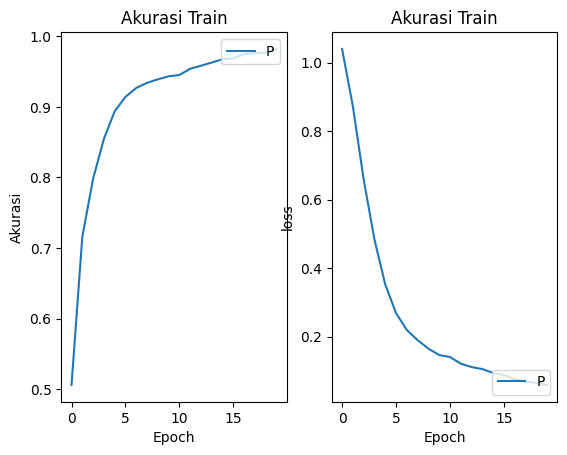

In [16]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'])
plt.title('Akurasi Train')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend('Pelatihan', loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'])
plt.title('Akurasi Train')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend('Pelatihan', loc='lower right')

plt.show()

In [18]:
data_test = ['fitur dari aplikasi ini jelek dan lambat, saya tidak bisa banyak gagal memesan tiket', 'bagus banget aplikasinya, saya jadi bisa memesan tiket kereta dengan mudah']


In [19]:
new_data_tfidf = tfidf.transform(data_test).toarray()  # Transform input baru ke bentuk TF-IDF
predictions = model.predict(new_data_tfidf)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [20]:
import numpy as np
# Interpretasi hasil prediksi
predicted_indices = np.argmax(predictions, axis=1)
predicted_labels = [list(label_mapping.keys())[list(label_mapping.values()).index(idx)] for idx in predicted_indices]

print("\nPrediksi:")
for i, text in enumerate(data_test):
    print(f"Teks: \"{text}\", Prediksi Kelas: {predicted_labels[i]}")


Prediksi:
Teks: "fitur dari aplikasi ini jelek dan lambat, saya tidak bisa banyak gagal memesan tiket", Prediksi Kelas: negative
Teks: "bagus banget aplikasinya, saya jadi bisa memesan tiket kereta dengan mudah", Prediksi Kelas: negative
